This following code implements Thomas C. Schelling. 1978. “Thermostats, Lemons, and Other Families of Models.” Micromotives and Macrobehavior. (pgs 83-87)

Replication of Thermostat Model by Chen-Shuo Hong (2017) <br />
The values of parameters draw from James Kitts (2005)

This model is an illustration of cyclical behavior. Namely, the behaviors will continue themselves even after the states reach the system's requirements. This model can be used to explain the vaccine program and education reform.

$airtemp_{t+1}$ = $airtemp_{t}$ + $a1$*($watertemp_{t}$-$airtemp_{t}$) + $a2$*($outtemp$-$airtemp_{t}$) <br />
$watertemp_{t+1}$ = $watertemp_{t}$ + $a3$*($airtemp_{t}$-$watertemp_{t}$) + $a4$*($furnace_{t}$) <br />
$furnace$ is 1 if on, 0 if off 

Note: this replication is system-level, deterministic, synchronous, discrete-time-implementation

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Set Parameters
a1 = 0.03 # the adjustment of airtemp based on the difference between airtemp and watertemp
a2 = 0.01 # the adjustment of airtemp based on the difference between airtemp and outtemp
a3 = 0.02 # the adjustment of watertemp based on the difference between airtemp and watertemp
a4 = 1.0 # the adjustment of watertemp based on the state of furnace
maxt = 1000 # specify the number of iterations for Thermostat Model
req = 68 # the thermostat temperature setting
outtemp = 45 # the outside temperature

In [27]:
# Set Initial Conditions
airtemp1 = 55
watertemp1 = 50
furnace1 = 0

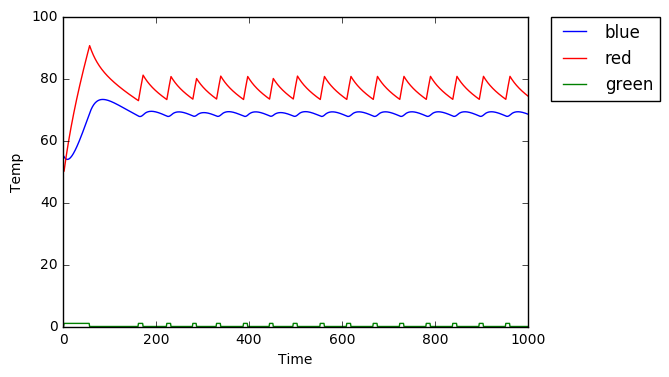

In [29]:
# Create Richardson Arms Race Function
def thermostat(a1, a2, a3, a4, n, thermo):
    x = np.zeros(n)                # create n x 1 vector of zeros for airtemp 
    y = np.zeros(n)                # create n x 1 vector of zeros for watertemp
    z = np.zeros(n)                # create n x 1 vector of zeros for furnace
    time = np.arange(1, n+1)      
    x[0] = airtemp1
    y[0] = watertemp1
    z[0] = furnace1
    for i in range (0, n-1):                    # iteration over time(n)
        z[i+1] = int(x[i] < thermo)
        x[i+1] = x[i] + a1*(y[i]-x[i]) + a2*(outtemp-x[i])  #update airtemp level as next row in x
        y[i+1] = y[i] + a3*(x[i]-y[i]) + a4*z[i]  #update watertemp level as next row in y
    #print(x)
    #print(y)
    #print(z)
    plt.plot(time, x, 'b', label = "blue")
    plt.plot(time, y, 'r', label = "red")
    plt.plot(time, z, 'g', label = "green")
    ymin = min(min(x), min(y)) + 0.01
    ymax = max(max(x), max(y)) + 0.01

thermostat(a1, a2, a3, a4, maxt, req)
plt.xlabel('Time')
plt.ylabel('Temp')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # plot legend outside of graph
plt.show()